In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data = pd.concat([train,test],axis=0,join='outer')

In [6]:
data.shape

(14204, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
# treating null values in Item_Weight

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [11]:
# treating null values in Outlet_Size
data['Outlet_Size'] = data['Outlet_Size'].fillna('MEDIUM')

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# UNIVARIATE ANALYSIS

In [14]:
nums = data.select_dtypes(include = np.number).columns

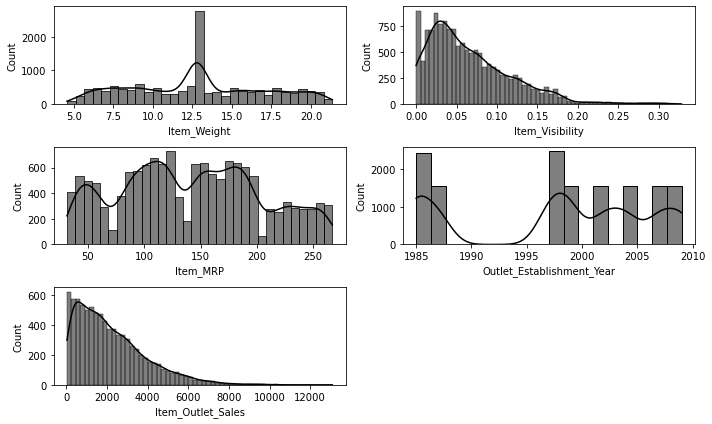

In [17]:
n_rows=3
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.histplot(data.loc[:,i],kde=True,color='black')
    counter+=1

plt.tight_layout()
plt.show()

## INFERENCE

* Item Outlet Sales in positively skewed in nature
* No pattern seen in outlet year
* Item Mrp has multimodel nature
* Item_Visibility is positively skewed 

In [19]:
cat = data.select_dtypes(include = object).columns
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

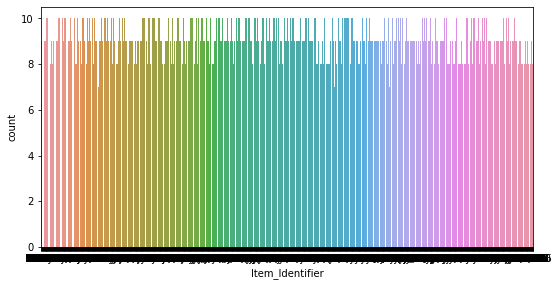

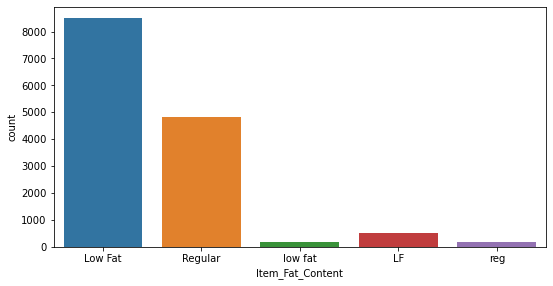

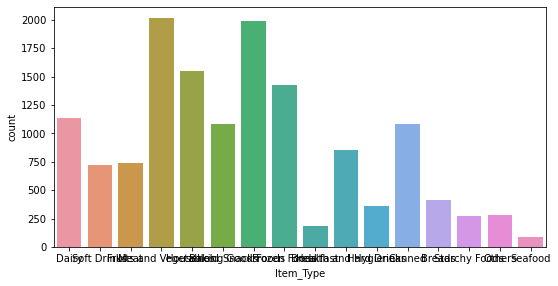

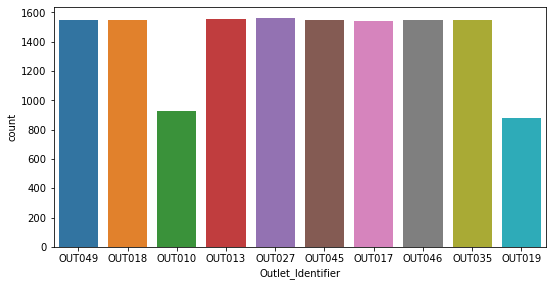

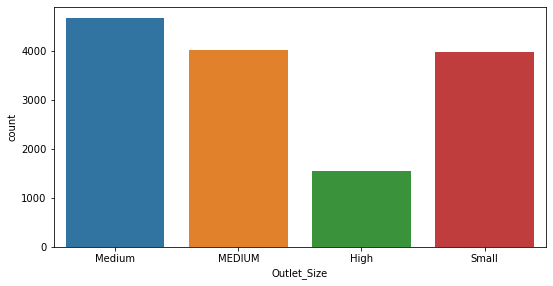

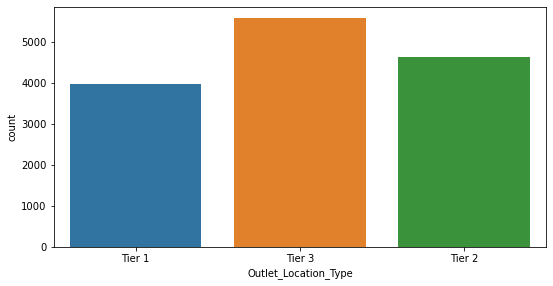

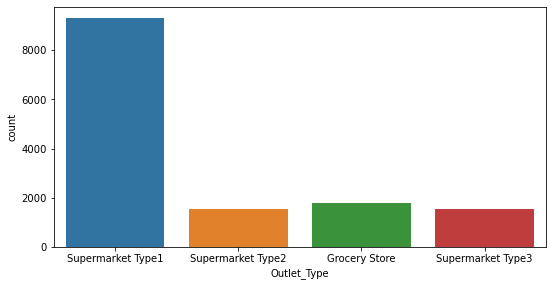

In [24]:
counter = 1
for i in cat:
    plt.figure(figsize=(30,15))
    plt.subplot(3,3,counter)
    sns.countplot(data[i])
    plt.show()

In [25]:
# replace LF reg and low fat into resp catgories...
data.Item_Fat_Content.replace(to_replace=['LF','reg','low fat'],value=['Low Fat','Regular','Low Fat'],inplace=True)

## INFERENCE

* We realized that this store is mostly opened in tier03 cities and the type of outlet is medium size outlet the items that are sold in the outlet are fruits and vegetables,snacks,frozen, Household followed by dairy
* lowest performing outlets - out10 and out19
* s1 appears to be the most commonly seen outlet across the locations

# BIVARIATE ANALYSIS

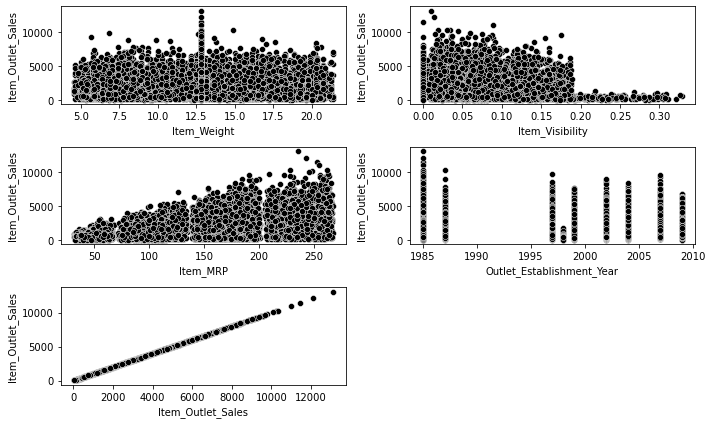

In [27]:
n_rows=3
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.scatterplot(i,'Item_Outlet_Sales',data=data,color='black')
    counter+=1

plt.tight_layout()
plt.show()

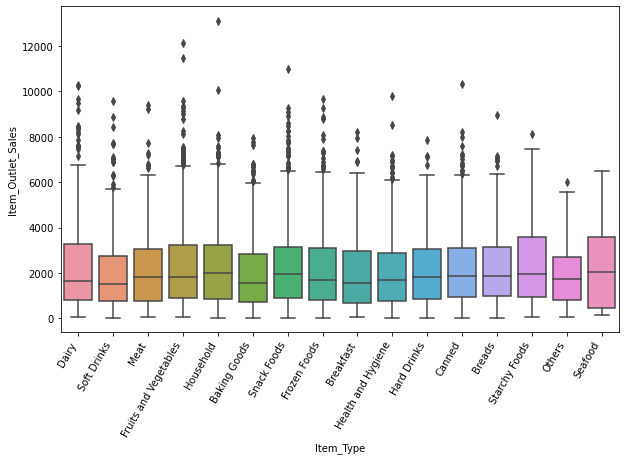

In [28]:
#Cat vs num

#Item_Type vs Sales
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

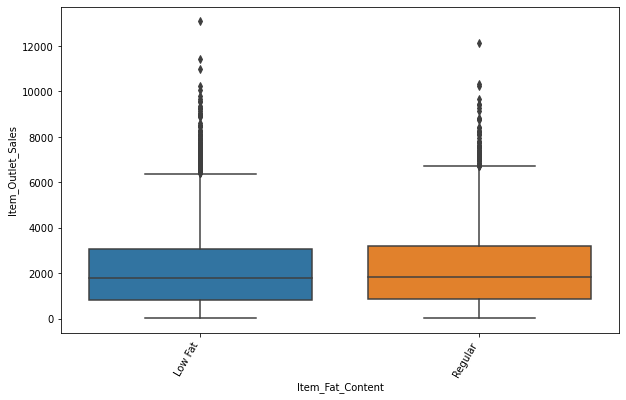

In [32]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

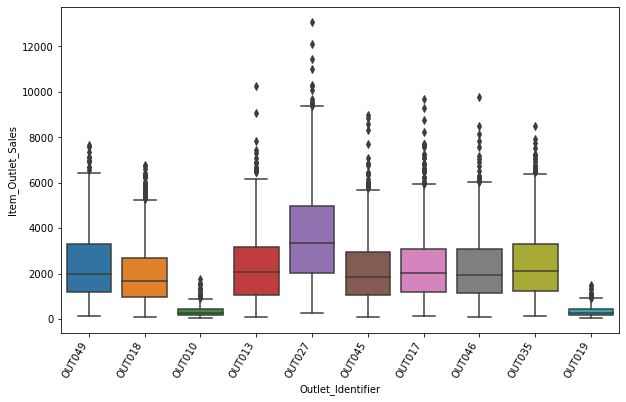

In [33]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

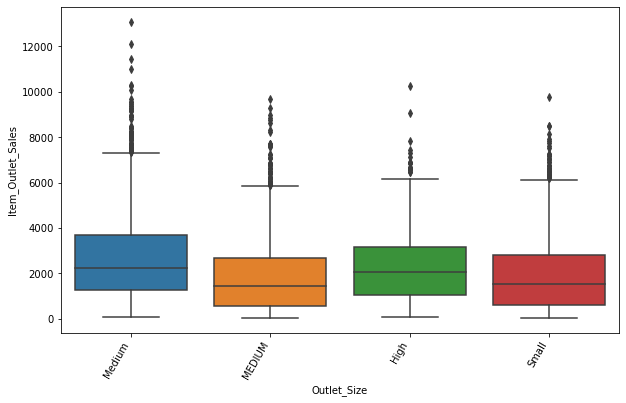

In [34]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

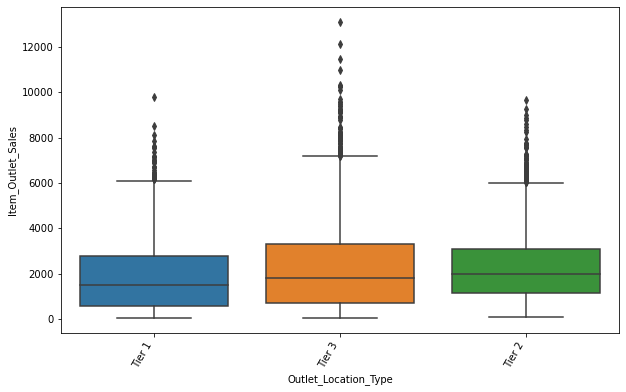

In [35]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

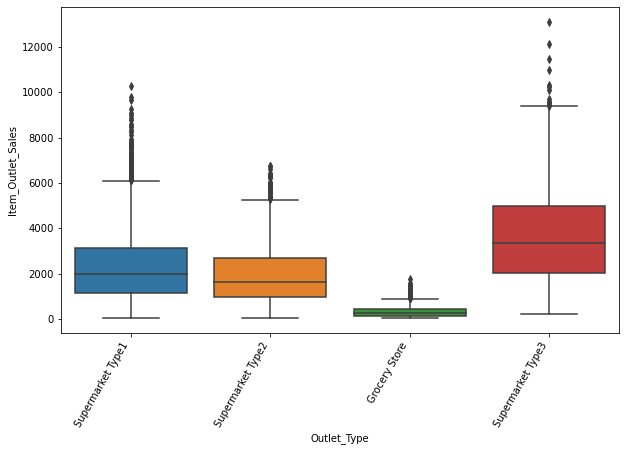

In [36]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

## Bivariate Summary for cat vs num
* Fruits and vegetable, and Household items have the highest outlet sales
* Low Fat items have a slightly higher outlet Sales than Regular item sales
* Medium Scale outlets generate more revenue
* tier 3 cities have a considerably higher sales than other tiers
* Supermarket type3 have the highest outlet sales while Grocery stores have the lowest
* Most performing outlet is outlet 27

### FEATURE ENGINEERING 

In [38]:
lst=[]
for x in data['Item_Identifier']:
    lst.append(x[:2])

data['Item_ID_Cat']=lst

In [39]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR


In [40]:
pd.crosstab(data.Item_ID_Cat,data.Item_Fat_Content)

Item_Fat_Content,Low Fat,Regular
Item_ID_Cat,,
DR,1208,109
FD,5291,4910
NC,2686,0


In [41]:
data.loc[data['Item_ID_Cat']=='NC','Item_Fat_Content']='Non Edible'

In [42]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [43]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
perish = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Snack Foods', 'Breakfast','Breads', 'Starchy Foods', 'Seafood']

In [45]:
def new_labels(x):
    if x in perish:
        return('Perishables')
    else:
        return('Non-Perishables')

In [46]:
data['Item_Type_Perish']=data['Item_Type'].apply(new_labels)

In [47]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].max().sort_values(ascending=False).index

Index(['OUT027', 'OUT013', 'OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049',
       'OUT018', 'OUT010', 'OUT019'],
      dtype='object', name='Outlet_Identifier')

In [48]:
low=['OUT010','OUT019']
high=['OUT027','OUT013']
average=['OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049','OUT018']

In [49]:
def high_average(x):
    if x in low:
        return 'low'
    elif x in average:
        return 'average'
    else:
        return 'high'

In [50]:
data['performing']=data['Outlet_Identifier'].apply(high_average)

In [53]:
data['Vintage']=2013 - data.Outlet_Establishment_Year

In [54]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MEDIUM,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26
